In [1]:
import warnings

warnings.filterwarnings("ignore")

# Introduction to protein functionality and structure design
*Copyright (c) 2022 Institute for Quantum Computing, Baidu Inc. All Rights Reserved.*

Proteins are important structural and functional molecules in biological organisms. They form long chains by assembling amino acids and realize specific functionality through the spatial structure of amino acid chains. The spatial structure of proteins refers to the conformation of amino acid chains in three-dimensional space. This conformation can be determined by X-ray diffraction, nuclear magnetic resonance, or other methods. Studies have shown that the spatial structure of proteins is closely related to their functionalities. For example, as an important class of proteins, enzymes determine their interaction with substrates through their spatial structure, thus realizing the catalytic effect of chemical reactions. In addition, the spatial structure of proteins can be controlled by changing the amino acid sequence to regulate their functionality.

Proteins produce different spatial structures in different folding modes, it is important to study protein folding in order to predict protein behaviors. Due to the high complexity and non-linearity appearing in the protein structures, it's inefficient to solve protein folding problems via classical computation. Quantum computation can quickly solve complex non-linear optimization problems based on the principles of quantum mechanics, and is generally believed to be of great help in future research on protein folding.

## Using quantum computation method to simulate the protein folding
### Lattice model
In protein structure research, a common method is the lattice model \[1\], which divides the amino acid chain in the protein into a series of lattice units, each of which includes several amino acids. By analyzing the interaction between lattice units, we can infer the spatial structure of the protein. The lattice model can help us better understand the structure and function of proteins, and provide an important theoretical basis for drug design and disease treatment.
![](lattice_model_en.jpg)

In [3]:
from paddle_quantum.biocomputing import Protein

protein = Protein("APRLRFY")
print(protein)

Protein with 7 nodes and 6 edges


With the `biocomputing` module in `paddle_quantum`, we can easily construct a protein., the above code has built an amino acid chain contains 7 amino acids.

Starting from the lattice model, we can obtain a protein Hamiltonian \[2\] based on the interactions between lattice points. We can then construct a variational quantum algorithm (VQE) based on this Hamiltonian to solve for the stable structure (the structure with the lowest energy) of the protein molecule.

In [4]:
# lambda0 and lambda1 are two parameters used in constraining the spatial structure of protein.
h = protein.get_protein_hamiltonian(lambda0=10.0, lambda1=10.0)
print(h)

327.0085 I
-47.5 Z1, Z3
65.0 Z1, Z5
-50.0 Z1, Z7
52.5 Z1, Z9
-47.5 Z0, Z2
65.0 Z0, Z4
-50.0 Z0, Z6
52.5 Z0, Z8
-47.5 Z0, Z1, Z2, Z3
65.0 Z0, Z1, Z4, Z5
-50.0 Z0, Z1, Z6, Z7
52.5 Z0, Z1, Z8, Z9
-65.0 Z3, Z5
92.5 Z3, Z7
-60.0 Z3, Z9
-65.0 Z2, Z4
92.5 Z2, Z6
-60.0 Z2, Z8
-65.0 Z2, Z3, Z4, Z5
92.5 Z2, Z3, Z6, Z7
-60.0 Z2, Z3, Z8, Z9
-72.5 Z5, Z7
92.5 Z5, Z9
-72.5 Z4, Z6
92.5 Z4, Z8
-72.5 Z4, Z5, Z6, Z7
92.5 Z4, Z5, Z8, Z9
-65.0 Z7, Z9
-65.0 Z6, Z8
-65.0 Z6, Z7, Z8, Z9
-157.168 Z12
30.0 Z1, Z3, Z12
-40.0 Z1, Z5, Z12
30.0 Z1, Z7, Z12
-27.5 Z1, Z9, Z12
30.0 Z0, Z2, Z12
-40.0 Z0, Z4, Z12
30.0 Z0, Z6, Z12
-27.5 Z0, Z8, Z12
30.0 Z0, Z1, Z2, Z3, Z12
-40.0 Z0, Z1, Z4, Z5, Z12
30.0 Z0, Z1, Z6, Z7, Z12
-27.5 Z0, Z1, Z8, Z9, Z12
37.5 Z3, Z5, Z12
-52.5 Z3, Z7, Z12
30.0 Z3, Z9, Z12
37.5 Z2, Z4, Z12
-52.5 Z2, Z6, Z12
30.0 Z2, Z8, Z12
37.5 Z2, Z3, Z4, Z5, Z12
-52.5 Z2, Z3, Z6, Z7, Z12
30.0 Z2, Z3, Z8, Z9, Z12
37.5 Z5, Z7, Z12
-40.0 Z5, Z9, Z12
37.5 Z4, Z6, Z12
-40.0 Z4, Z8, Z12
37.5 Z4, Z5, Z6, Z7, Z12
-

### Variational quantum circuit
Users can use variational quantum algorithm (VQA) to solve protein folding problem, the variational quantum circuit is shown below

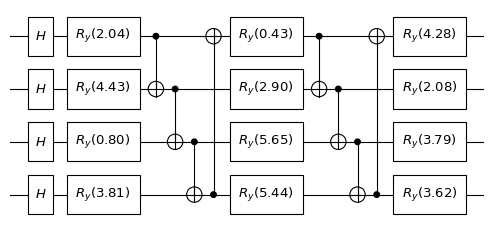

In [5]:
from folding_protein import circuit

# The following code builds a 4-qubit parameterized circuit that contains two circuit blocks (NOTE: one circuit block contains a layer of RY and a layer of CNOT).
cir = circuit(4, 2)
cir.plot()

## How to use
Users can customize their task via a configuration file `config.toml`, the user defined settings are listed below.
```toml
# The configuration file for protein folding problem

# The amino acides consists in protein. 
amino_acids = ["A", "P", "R", "L", "R", "F", "Y"]
# Pair of indices indicates the potentially interact amino acide pair.
possible_contactions = [[0, 5], [1, 6]]
# Depth of the quantum circuit used in VQE
depth = 1
# Number of VQE iterations
num_iterations = 200
# The condition for VQE convergence
tol = 1e-3
# The number of steps between two consecutive loss records
save_every = 10
# learning rate for the optimizer
learning_rate = 0.5
```
In order to obtained the 3D structure of the amino acid sequence, user can run
```shell
python folding_protein.py --config config.toml
```
in terminal, the program will save the figure automatically after the computation.

![](APRLRFY_3d_structure.jpg)


## References 
\[1\] Pande, Vijay S., and Daniel S. Rokhsar. "Folding pathway of a lattice model for proteins." Proceedings of the National Academy of Sciences 96.4 (1999): 1273-1278.

\[2\] Robert, Anton, et al. "Resource-efficient quantum algorithm for protein folding." npj Quantum Information 7.1 (2021): 1-5.